# Лабораторна 1 — Марковські процеси

## Import

In [1]:
from task_1 import task_1
from task_2 import task_2
from task_3 import task_3
from task_4 import task_4
from task_5 import task_5
from task_6 import task_6

## Завдання 1

![Task1](../Images/1.png)

100%|██████████| 1/1 [00:00<00:00,  2.84it/s]


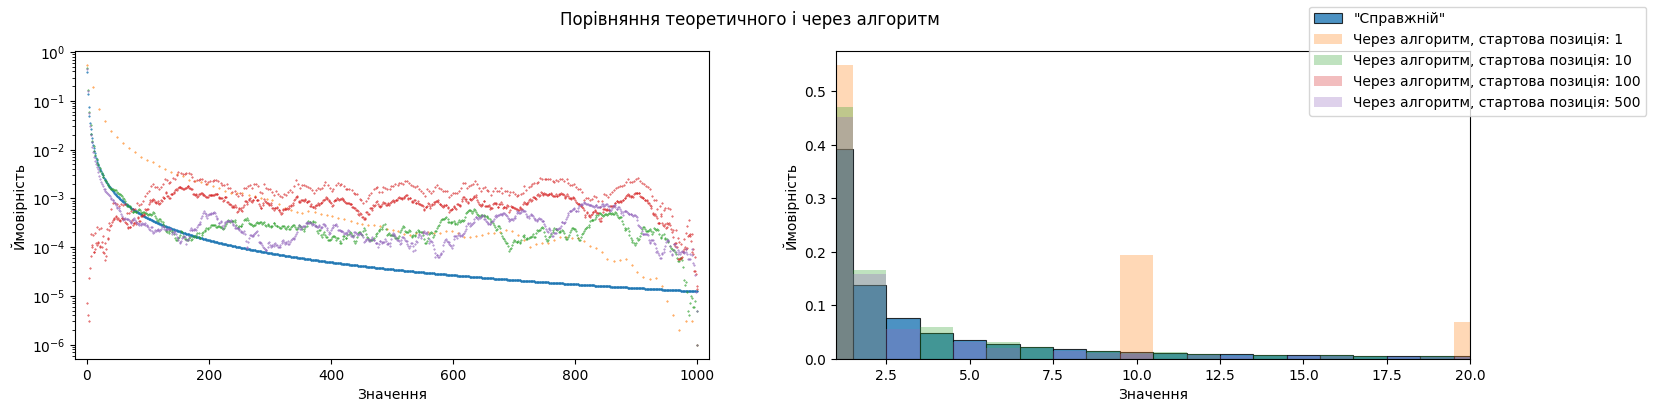

In [2]:
task_1(i_lims = [1, 1000], n = int(1e6), start_pos = [1, 10, 100, 500], figsize = (18, 4))

## Завдання 2

![Task2](../Images/2.png)

In [3]:
result = task_2("../Data/TheWarOfTheWorlds.txt", "../Data/TheTimeMachine.txt", iterations=250, report_every=500)
result["best_score"]

Start score: -675455.20, unique learn chars: 26



  1%|          | 2/250 [00:00<00:14, 17.57it/s]


iter 1/250 | curr -675455.20 | best -675455.20



100%|██████████| 250/250 [00:14<00:00, 17.09it/s]


[Example outputs]

[Ciphered sample]
 thsdqnv garghomo, ghd, bqddho-ivod ind nop tgbfsmolr. Qm
ojqrmr aotisro gx mco oxxglmr gx csndlodr gx kghsnmoolr ind dgnimqgnr
xlgb fogfho qn ihh pihwr gx hqxo.

Kghsnmoolr ind xqnintqih rsffglm m

[Deciphered sample]
 gfwdant oxrofele, ofd, baddfe-ited ind nem gobhwlesr. Al
eparlr xegiwre oc lye eccoslr oc ywndsedr oc vofwnleesr ind donilaonr
csob heohfe an iff mifkr oc face.

Vofwnleesr ind caningaif rwhhosl l

[True mapping]
{'a': 'i', 'b': 'a', 'c': 't', 'd': 'd', 'e': 'o', 'f': 'x', 'g': 'v', 'h': 'c', 'i': 'q', 'j': 'e', 'k': 'w', 'l': 'h', 'm': 'b', 'n': 'n', 'o': 'g', 'p': 'f', 'q': 'y', 'r': 'l', 's': 'r', 't': 'm', 'u': 's', 'v': 'k', 'w': 'p', 'x': 'j', 'y': 'z', 'z': 'u'}

[Recovered mapping]
{'a': 'x', 'b': 'b', 'c': 'y', 'd': 'd', 'e': 'q', 'f': 'h', 'g': 'o', 'h': 'f', 'i': 'i', 'j': 'p', 'k': 'v', 'l': 's', 'm': 'l', 'n': 'n', 'o': 'e', 'p': 'm', 'q': 'a', 'r': 'r', 's': 'w', 't': 'g', 'u': 'j', 'v': 't', 'w': 'k', 'x': 'c', 'y': '

np.float64(-484547.0719969473)

## Завдання 3

![Task3](../Images/3.png)

100%|██████████| 100000/100000 [00:00<00:00, 235613.61it/s]


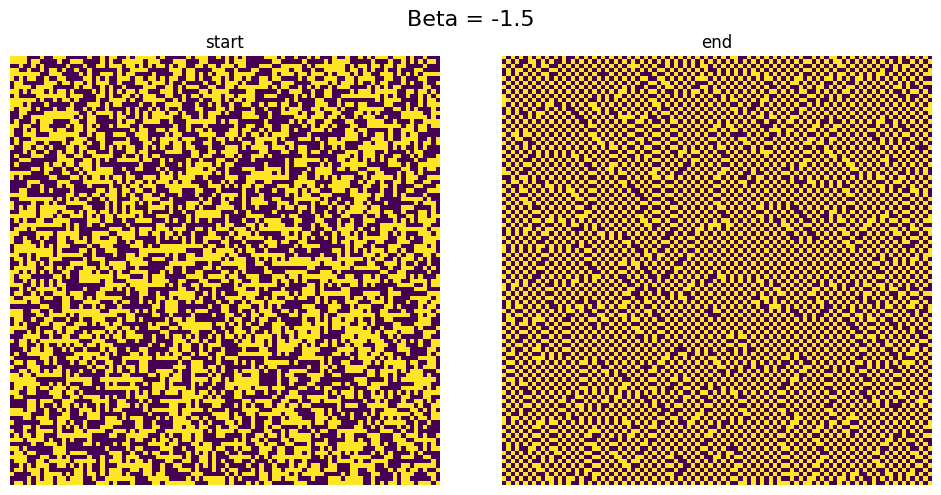

100%|██████████| 100000/100000 [00:00<00:00, 1290932.43it/s]


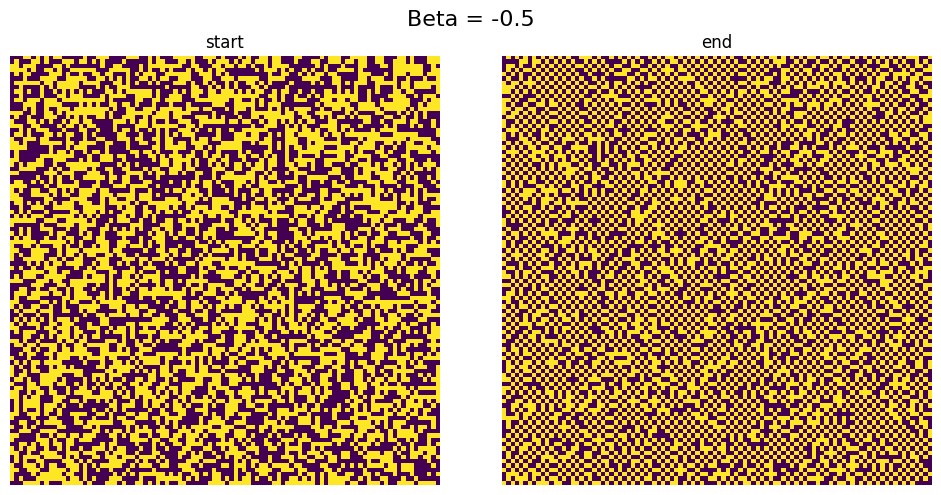

100%|██████████| 100000/100000 [00:00<00:00, 1291210.61it/s]


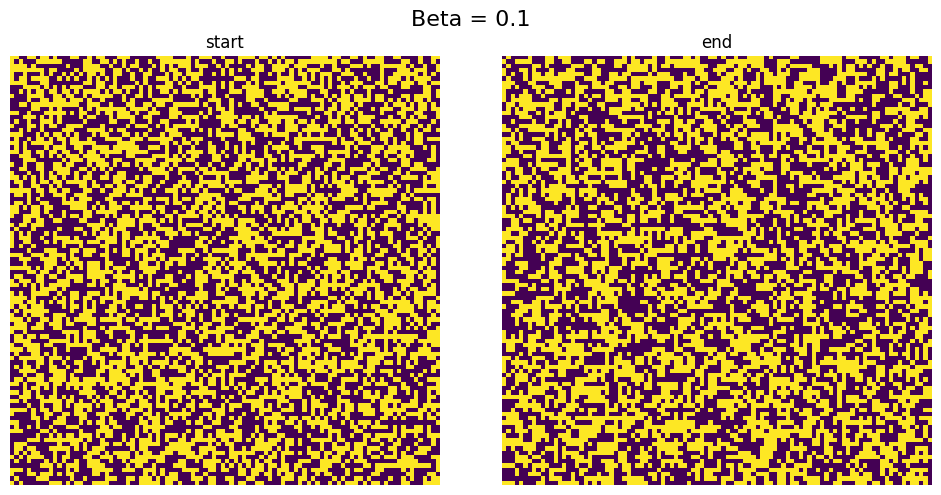

100%|██████████| 100000/100000 [00:00<00:00, 1318635.94it/s]


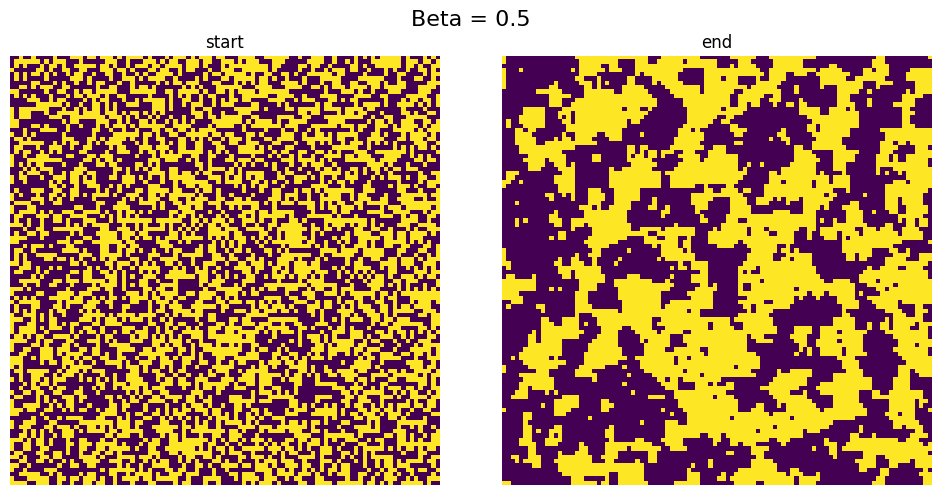

100%|██████████| 100000/100000 [00:00<00:00, 1314742.29it/s]


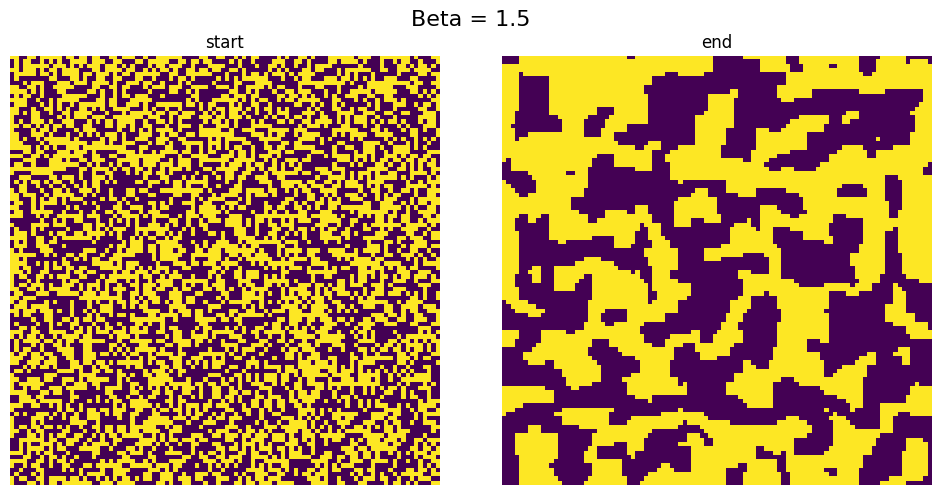

In [4]:
task_3(betas = [-1.5, -0.5, 0.1, 0.5, 1.5], grid_size=100, iterations=int(1e5))

## Завдання 4

![Task4](../Images/4.png)

100%|██████████| 50000/50000 [00:00<00:00, 324349.34it/s]


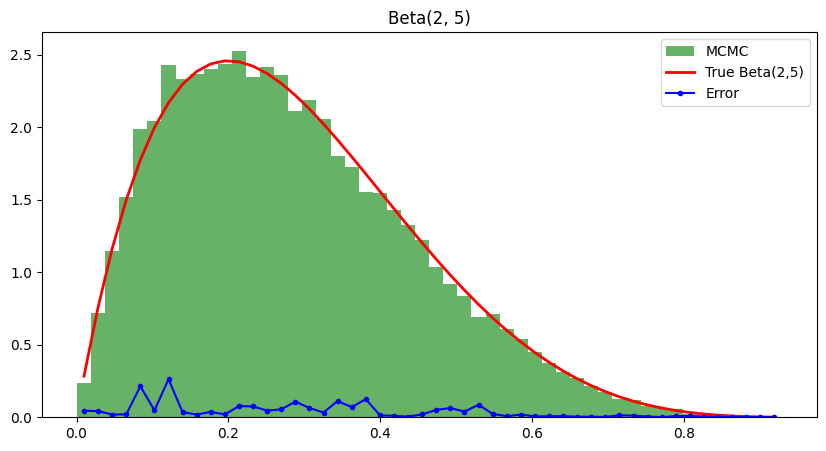

In [5]:
task_4(a=2, b=5, iterations=50000)

## Завдання 5

![Task5](../Images/5.png)

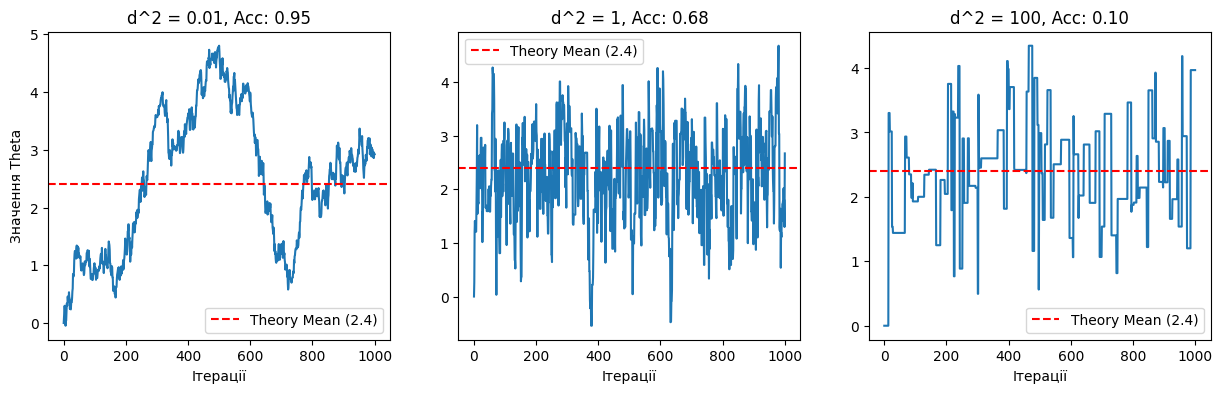

In [6]:
task_5(d_squared_list=[0.01, 1, 100])

## Завдання 6

![Task6](../Images/6.png)

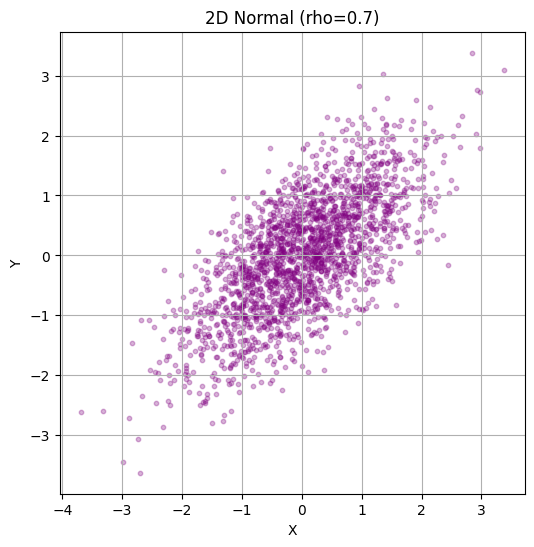

In [7]:
task_6(rho=0.7)